In [1]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/Data/210805_70ms_Mean3ea.csv'
SensorData = pd.read_csv(filename)

In [2]:
SensorData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17460 entries, 0 to 17459
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sx00       17460 non-null  float64
 1   Sx01       17460 non-null  float64
 2   Sx02       17460 non-null  float64
 3   Sx03       17460 non-null  float64
 4   Sx04       17460 non-null  float64
 5   Sx05       17460 non-null  float64
 6   Sx06       17460 non-null  float64
 7   Sx07       17460 non-null  float64
 8   Sx08       17460 non-null  float64
 9   Sx09       17460 non-null  float64
 10  r          17460 non-null  float64
 11  theta      17460 non-null  int64  
 12  theta_enc  17460 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.7 MB


In [3]:
import numpy as np
toRad = np.pi/180 
SensorData['cos']=np.cos(SensorData.theta_enc*toRad)
SensorData['sin']=np.sin(SensorData.theta_enc*toRad)

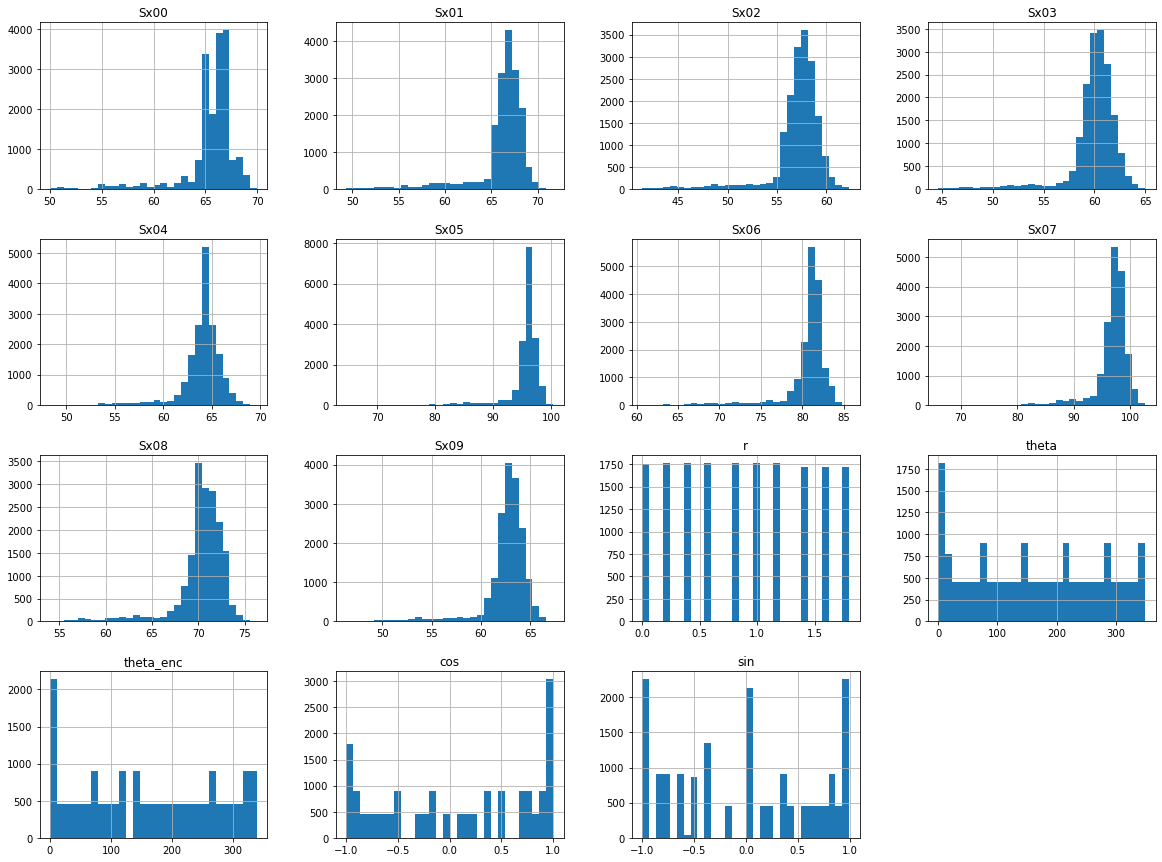

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
SensorData.hist(bins=30, figsize=(20,15))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/savefig/210805_70ms_Mean3ea_hist.png')
plt.show()

In [5]:
SensorData.describe()

Sx00          Sx01          Sx02          Sx03          Sx04  \
count  17460.000000  17460.000000  17460.000000  17460.000000  17460.000000   
mean      65.572538     66.194493     57.164222     59.867471     63.956854   
std        2.444883      2.742471      2.509686      2.358246      2.251420   
min       50.000000     49.330000     41.330000     44.670000     48.330000   
25%       65.330000     66.000000     56.670000     59.330000     63.330000   
50%       66.000000     66.670000     57.670000     60.330000     64.330000   
75%       66.670000     67.670000     58.330000     61.000000     65.000000   
max       70.000000     71.670000     62.330000     65.000000     69.670000   

               Sx05          Sx06          Sx07          Sx08          Sx09  \
count  17460.000000  17460.000000  17460.000000  17460.000000  17460.000000   
mean      95.573140     80.626290     96.946137     70.301565     62.580304   
std        2.625089      2.740268      2.754008      2.756882      2.353402   
min       64.670000     60.670000     66.000000     54.000000     46.330000   
25%       95.330000     80.330000     96.330000     69.670000     62.330000   
50%       96.000000     81.000000     97.330000     70.670000     63.000000   
75%       96.670000     82.000000     98.330000     71.670000     63.670000   
max      100.330000     85.670000    102.670000     76.330000     67.330000   

                  r         theta     theta_enc           cos           sin  
count  17460.000000  17460.000000  17460.000000  17460.000000  17460.000000  
mean       0.894433    163.233104    161.054516      0.085156      0.001740  
std        0.573052    108.830563    109.787439      0.721876      0.686803  
min        0.000000      0.000000      0.000000     -0.999555     -0.999857  
25%        0.400000     60.000000     58.400000     -0.636751     -0.650244  
50%        0.800000    160.000000    157.740000      0.183780      0.000000  
75%        1.400000    260.000000    260.460000      0.845262      0.684547  
max        1.800000    350.000000    339.570000      1.000000      0.995329

In [6]:
SensorData_extractZ =SensorData # SensorData[SensorData['z']==0]
mask = SensorData_extractZ["r"].isin([0,0.2,0.4])
SensorData_extractZr = SensorData_extractZ
SensorData_extractZr.sample(30)

Sx00   Sx01   Sx02   Sx03   Sx04   Sx05   Sx06    Sx07   Sx08   Sx09  \
14063  67.67  67.33  50.67  62.33  65.00  94.67  81.00   96.67  71.00  62.67   
16603  66.00  66.67  58.67  61.00  63.67  95.00  79.67   98.33  68.67  61.67   
9899   67.33  66.00  58.33  60.67  65.00  91.67  81.67   98.00  71.00  63.00   
15928  67.33  57.33  59.33  60.33  63.67  95.33  81.00   98.00  70.00  64.33   
13589  67.00  66.33  56.67  60.33  65.33  95.67  81.00   96.33  71.33  62.33   
16906  65.00  59.67  59.00  59.33  63.67  96.67  82.33   99.33  71.00  63.67   
7318   65.00  65.00  56.33  58.33  66.33  97.00  80.00   95.00  73.67  62.67   
10991  66.00  66.00  58.00  61.00  58.00  96.00  79.67   98.67  72.00  62.33   
14680  66.00  70.00  44.00  63.67  64.33  97.33  80.67   99.33  71.00  62.00   
13558  64.33  66.67  56.00  61.33  65.33  96.33  80.67   97.67  71.67  62.33   
16447  68.67  55.00  58.33  60.67  66.67  97.00  82.67   97.00  70.00  62.67   
6412   64.67  66.67  57.33  60.00  66.00  94.33  83.33   90.67  73.00  63.67   
8314   65.00  66.00  57.33  59.00  65.33  98.00  67.33   96.67  69.33  62.00   
8270   65.67  66.67  57.67  60.67  64.67  97.67  69.67   99.00  74.00  63.00   
2028   58.33  69.67  56.67  58.67  64.67  94.33  80.00   99.00  72.33  64.33   
1253   65.67  66.33  58.00  61.00  61.67  95.00  82.33   99.33  69.67  62.33   
4880   65.67  66.67  59.67  60.00  63.67  94.33  82.67   97.00  68.00  61.67   
5416   67.67  65.67  56.67  59.67  63.00  95.67  82.00   98.00  68.67  63.00   
4334   67.00  66.33  57.67  59.67  63.00  94.33  83.00   98.00  62.67  60.00   
4029   66.67  67.33  58.67  59.33  64.00  96.33  80.67   96.00  70.00  64.00   
13404  66.33  69.00  57.00  47.67  67.33  96.67  81.33  100.67  71.33  63.00   
8669   66.00  66.33  58.33  57.67  66.00  94.67  77.67   96.33  72.00  62.33   
16614  65.00  68.67  55.33  60.00  65.67  96.67  80.67   98.00  71.33  63.33   
6152   66.33  66.67  55.67  62.33  64.00  96.33  83.33   84.67  69.33  65.67   
1977   59.00  68.67  57.33  61.00  65.33  95.33  81.33   95.00  71.67  63.00   
6135   65.33  65.00  57.67  60.00  65.00  97.33  83.33   87.33  69.67  66.33   
7678   65.67  65.67  57.33  60.33  65.33  96.67  75.67   96.33  70.33  62.67   
9987   67.00  66.33  58.67  60.67  65.33  90.00  82.67   97.67  70.00  61.33   
4449   64.33  67.33  58.00  59.33  63.67  95.00  81.67   97.33  67.33  63.00   
17309  64.67  65.00  58.33  60.00  64.00  96.67  82.33   98.33  70.00  63.33   

         r  theta  theta_enc       cos       sin  
14063  0.8    280     280.59  0.183780 -0.982967  
16603  0.0    340     336.45  0.916712 -0.399549  
9899   0.4    190     188.22 -0.989726 -0.142974  
15928  1.0    320     321.20  0.779338 -0.626604  
13589  0.8    270     268.99 -0.017627 -0.999845  
16906  1.4    340     336.45  0.916712 -0.399549  
7318   0.8    130     124.06 -0.560061  0.828452  
10991  1.2    210     207.91 -0.883684 -0.468084  
14680  1.6    290     290.70  0.353475 -0.935444  
13558  0.6    270     268.99 -0.017627 -0.999845  
16447  1.4    330     327.74  0.845635 -0.533762  
6412   0.8    110     105.34 -0.264546  0.964373  
8314   1.4    150     143.57 -0.804583  0.593840  
8270   1.2    150     143.57 -0.804583  0.593840  
2028   1.4     10      10.15  0.984350  0.176226  
1253   0.0      0       0.04  1.000000  0.000698  
4880   0.0     80      77.39  0.218314  0.975879  
5416   0.4     90      84.42  0.097235  0.995261  
4334   1.6     60      58.40  0.523986  0.851727  
4029   0.4     60      58.40  0.523986  0.851727  
13404  1.8    260     260.46 -0.165736 -0.986170  
8669   0.8    160     157.72 -0.925342  0.379133  
16614  0.2    340     336.45  0.916712 -0.399549  
6152   1.8    100      97.82 -0.136061  0.990700  
1977   1.2     10      10.11  0.984473  0.175539  
6135   1.6    100      97.82 -0.136061  0.990700  
7678   0.4    140     136.80 -0.728969  0.684547  
9987   0.8    190     188.26 -0.989626 -0.143665  
4449   0.2     70      69.13  0.356249  0.934391

In [7]:
import numpy as np
np.random.seed(42)

<AxesSubplot:>

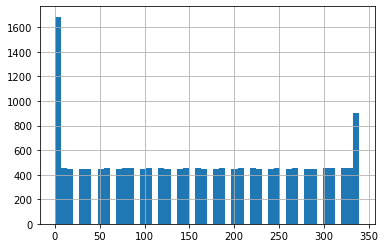

In [8]:
SensorData_extractZr["theta_enc"].hist(bins = 50)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(SensorData_extractZr, SensorData_extractZr["theta_enc"]):
    start_train_set = SensorData_extractZr.loc[train_index]
    start_test_set = SensorData_extractZr.loc[test_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
SensorData_extractZr["theta_enc"].value_counts()/len(start_test_set)

In [ ]:
SensorData_extractZr_copy = start_train_set.copy()

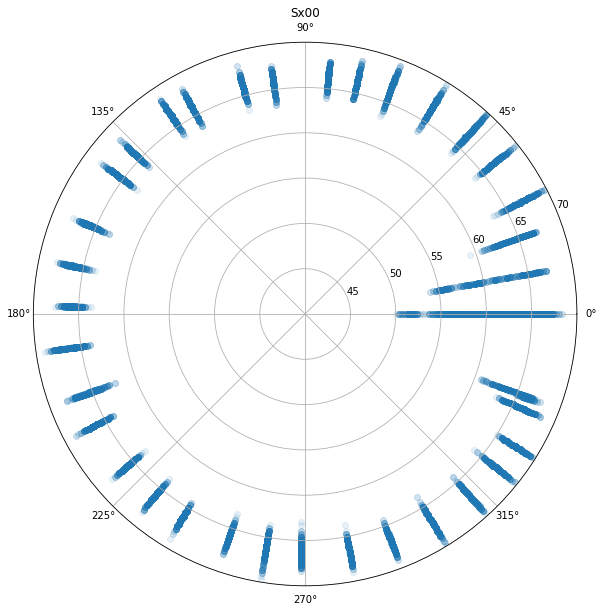

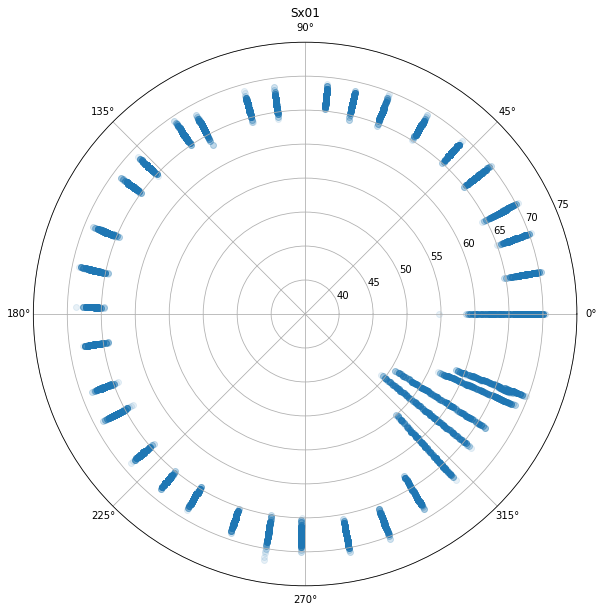

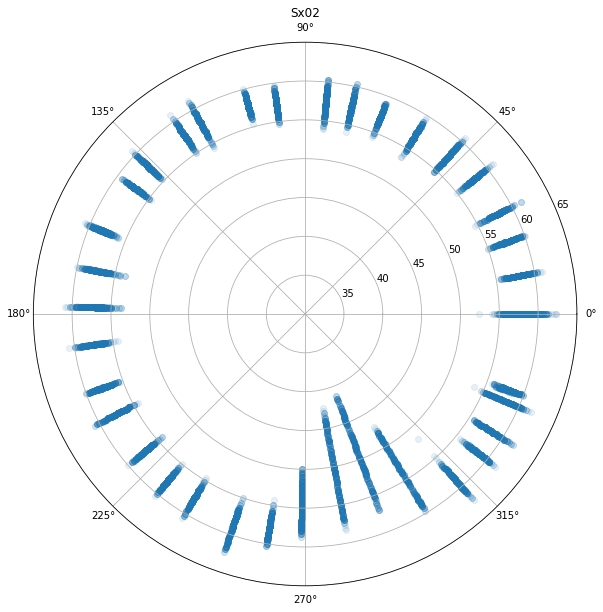

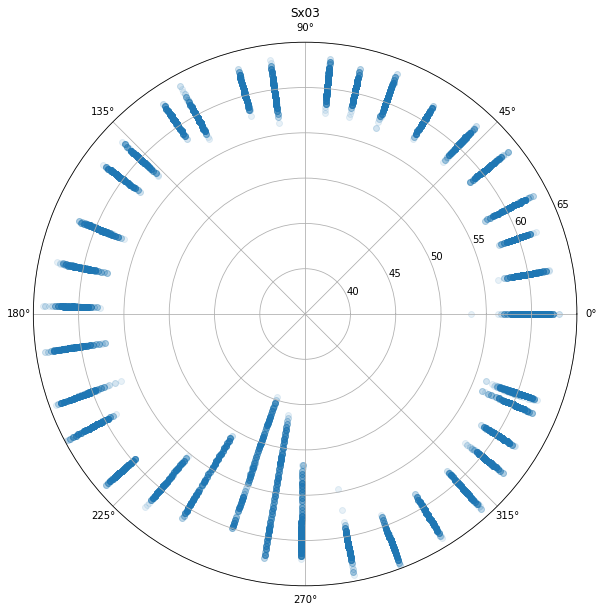

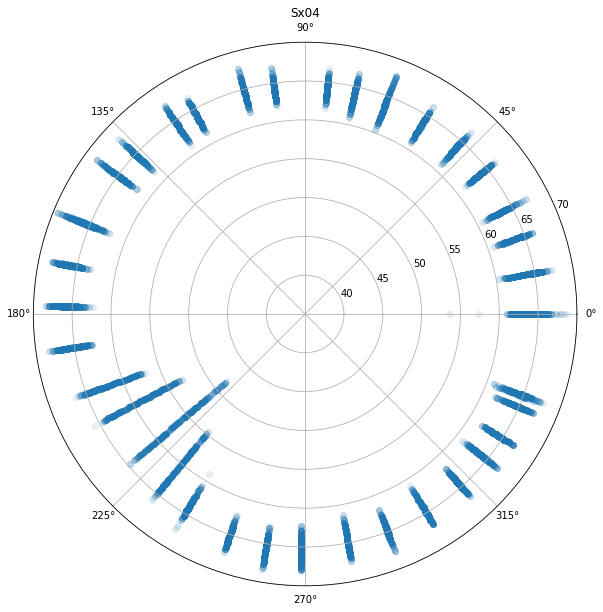

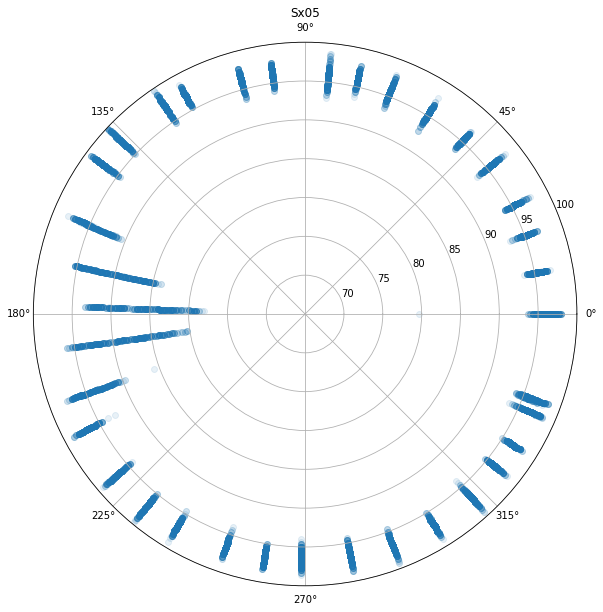

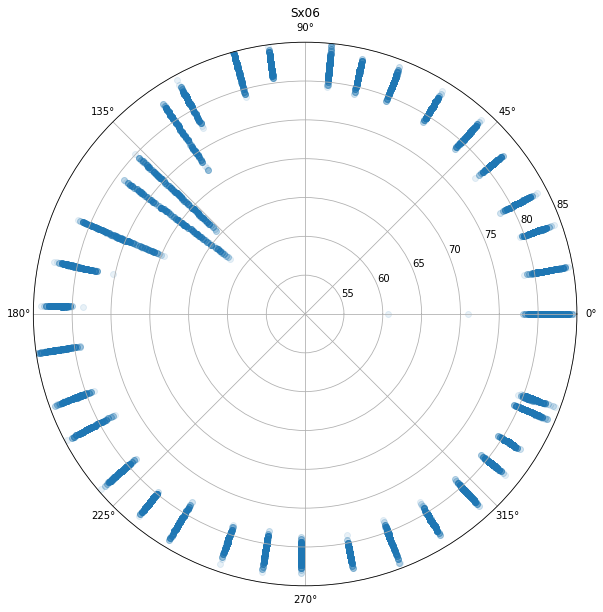

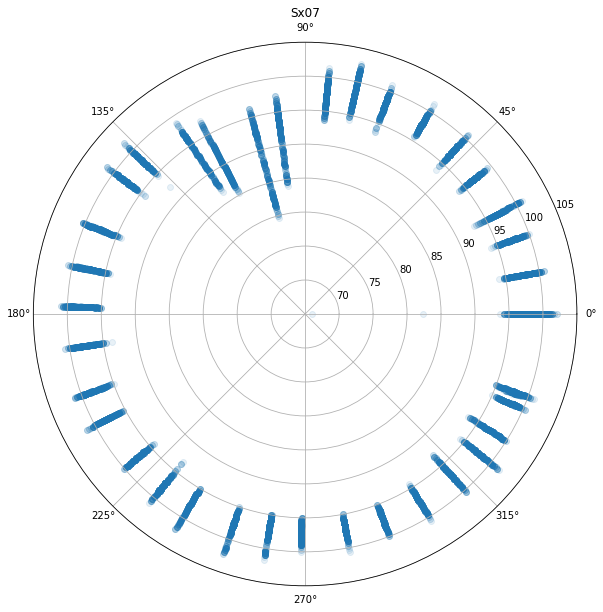

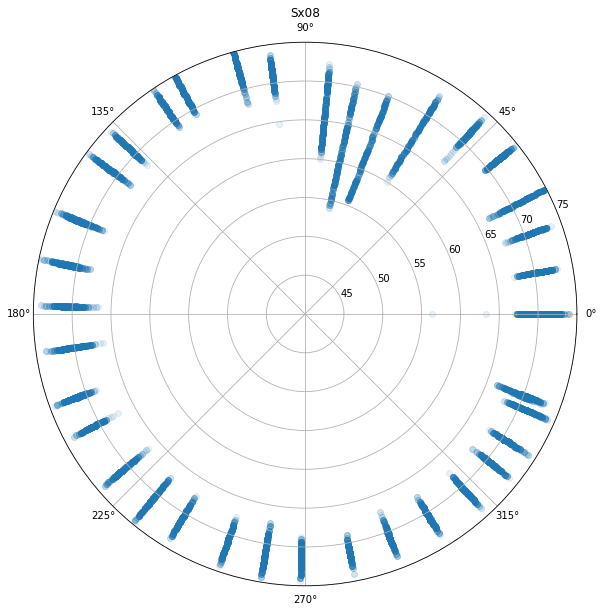

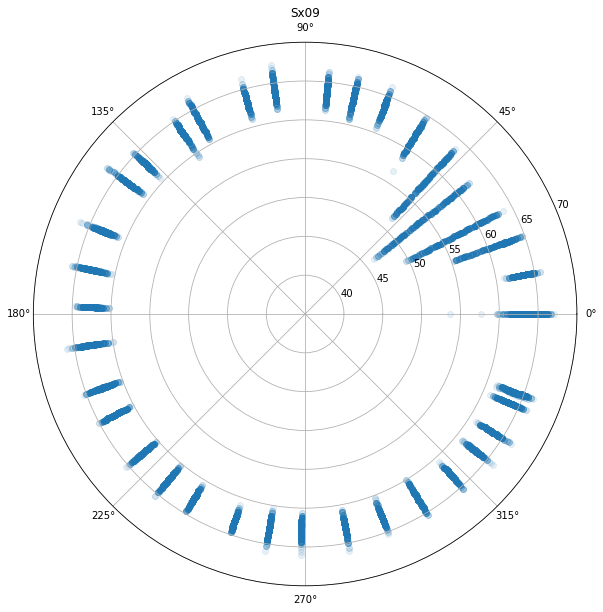

In [37]:
for i in range(0,10):
    plt.figure(figsize = (10,10))
    Sxarray=["Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
    Sxrange=[[50,70],[45,75],[40,65],[45,65],[45,70],[75,100],[60,85],[75,105],[50,75],[45,70]]
    spider_theta = SensorData_extractZr["theta_enc"]*toRad
    spider_r = SensorData_extractZr[Sxarray[i]]
    ax = plt.subplot(polar=True)
    c = ax.scatter(spider_theta, spider_r, alpha=0.1)
    ax.set_rmin(Sxrange[i][0]-10)
    ax.set_rmax(Sxrange[i][1])    
    plt.title(Sxarray[i])
    plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/savefig/210805_70ms_Mean3ea_hist_spider_{0}.png'.format(Sxarray[i]))
    plt.show()

<AxesSubplot:xlabel='theta_enc', ylabel='Sx00'>

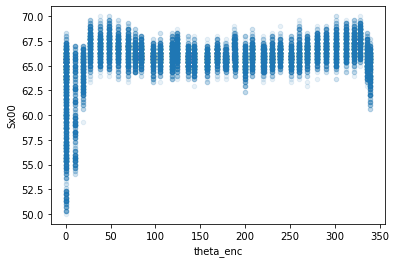

In [10]:
SensorData_extractZr.plot(kind="scatter", x= "theta_enc",y= "Sx00",alpha = 0.1)

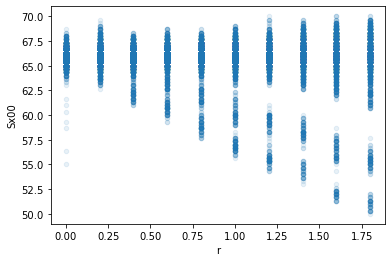

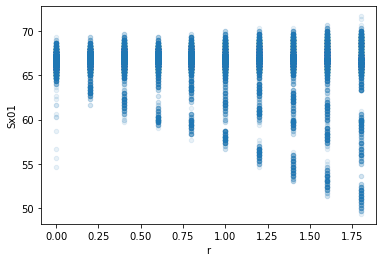

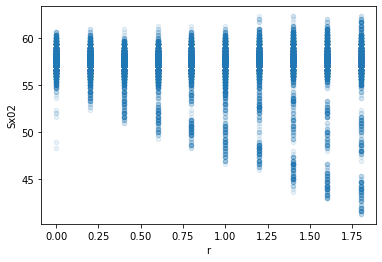

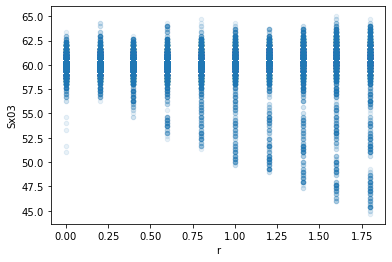

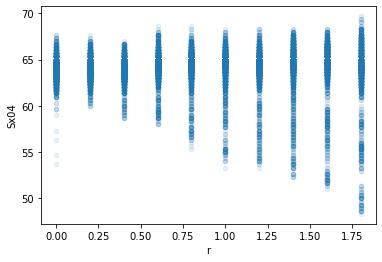

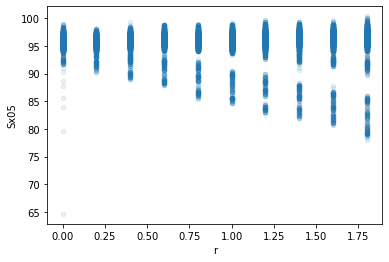

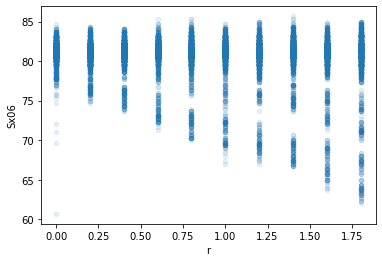

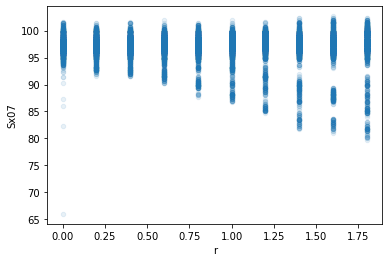

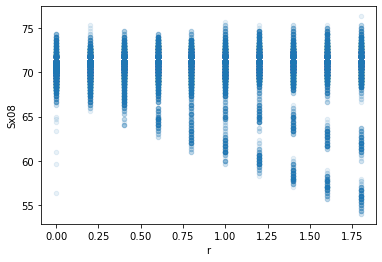

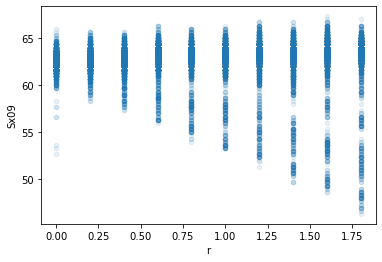

In [74]:
for i in range(0,10):
    Sxarray=["Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
    SensorData_extractZr.plot(kind="scatter", x= "r",y= Sxarray[i],alpha = 0.1)
    plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/savefig/210805_70ms_Mean3ea_hist_scatter_r_{0}.png'.format(Sxarray[i]))

<AxesSubplot:xlabel='Sx09', ylabel='z'>

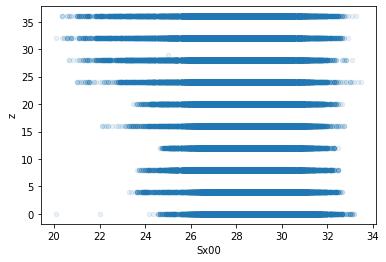

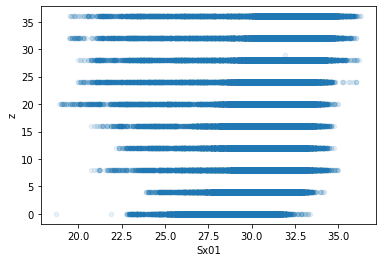

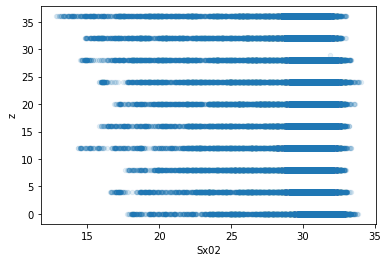

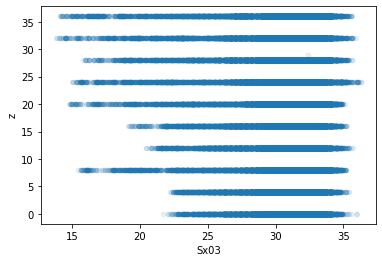

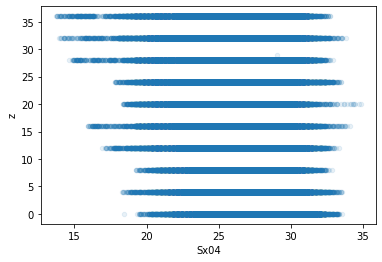

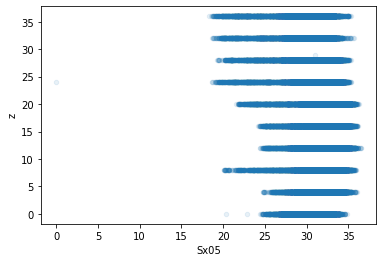

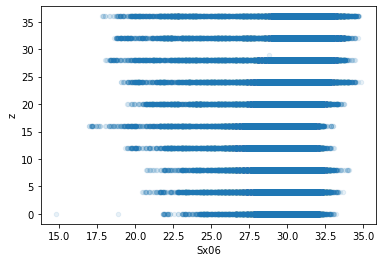

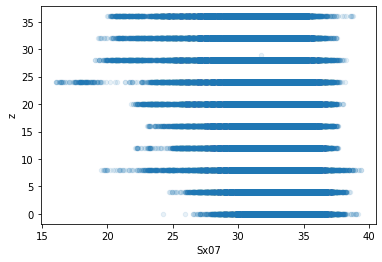

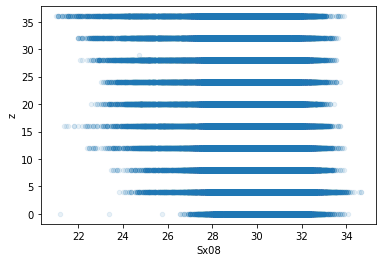

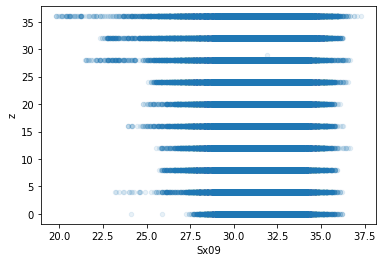

In [11]:
sensor.plot(kind="scatter", x= "Sx00",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx01",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx02",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx03",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx04",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx05",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx06",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx07",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx08",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx09",y= "z",alpha = 0.1)

In [43]:
corr_matrix = sensor_copy.corr()

In [44]:
corr_matrix["theta_enc"].sort_values(ascending=False)

theta_enc      1.000000
theta          0.989561
Sx05           0.414068
Sx04           0.288928
Sx02           0.234251
Sx09           0.160232
Sx03           0.146165
Sx01           0.129454
Sx06           0.114704
Sx00           0.087229
r              0.003352
Pressure      -0.111492
Temperature   -0.189265
Sx08          -0.249910
Sx07          -0.321280
z                   NaN
Name: theta_enc, dtype: float64

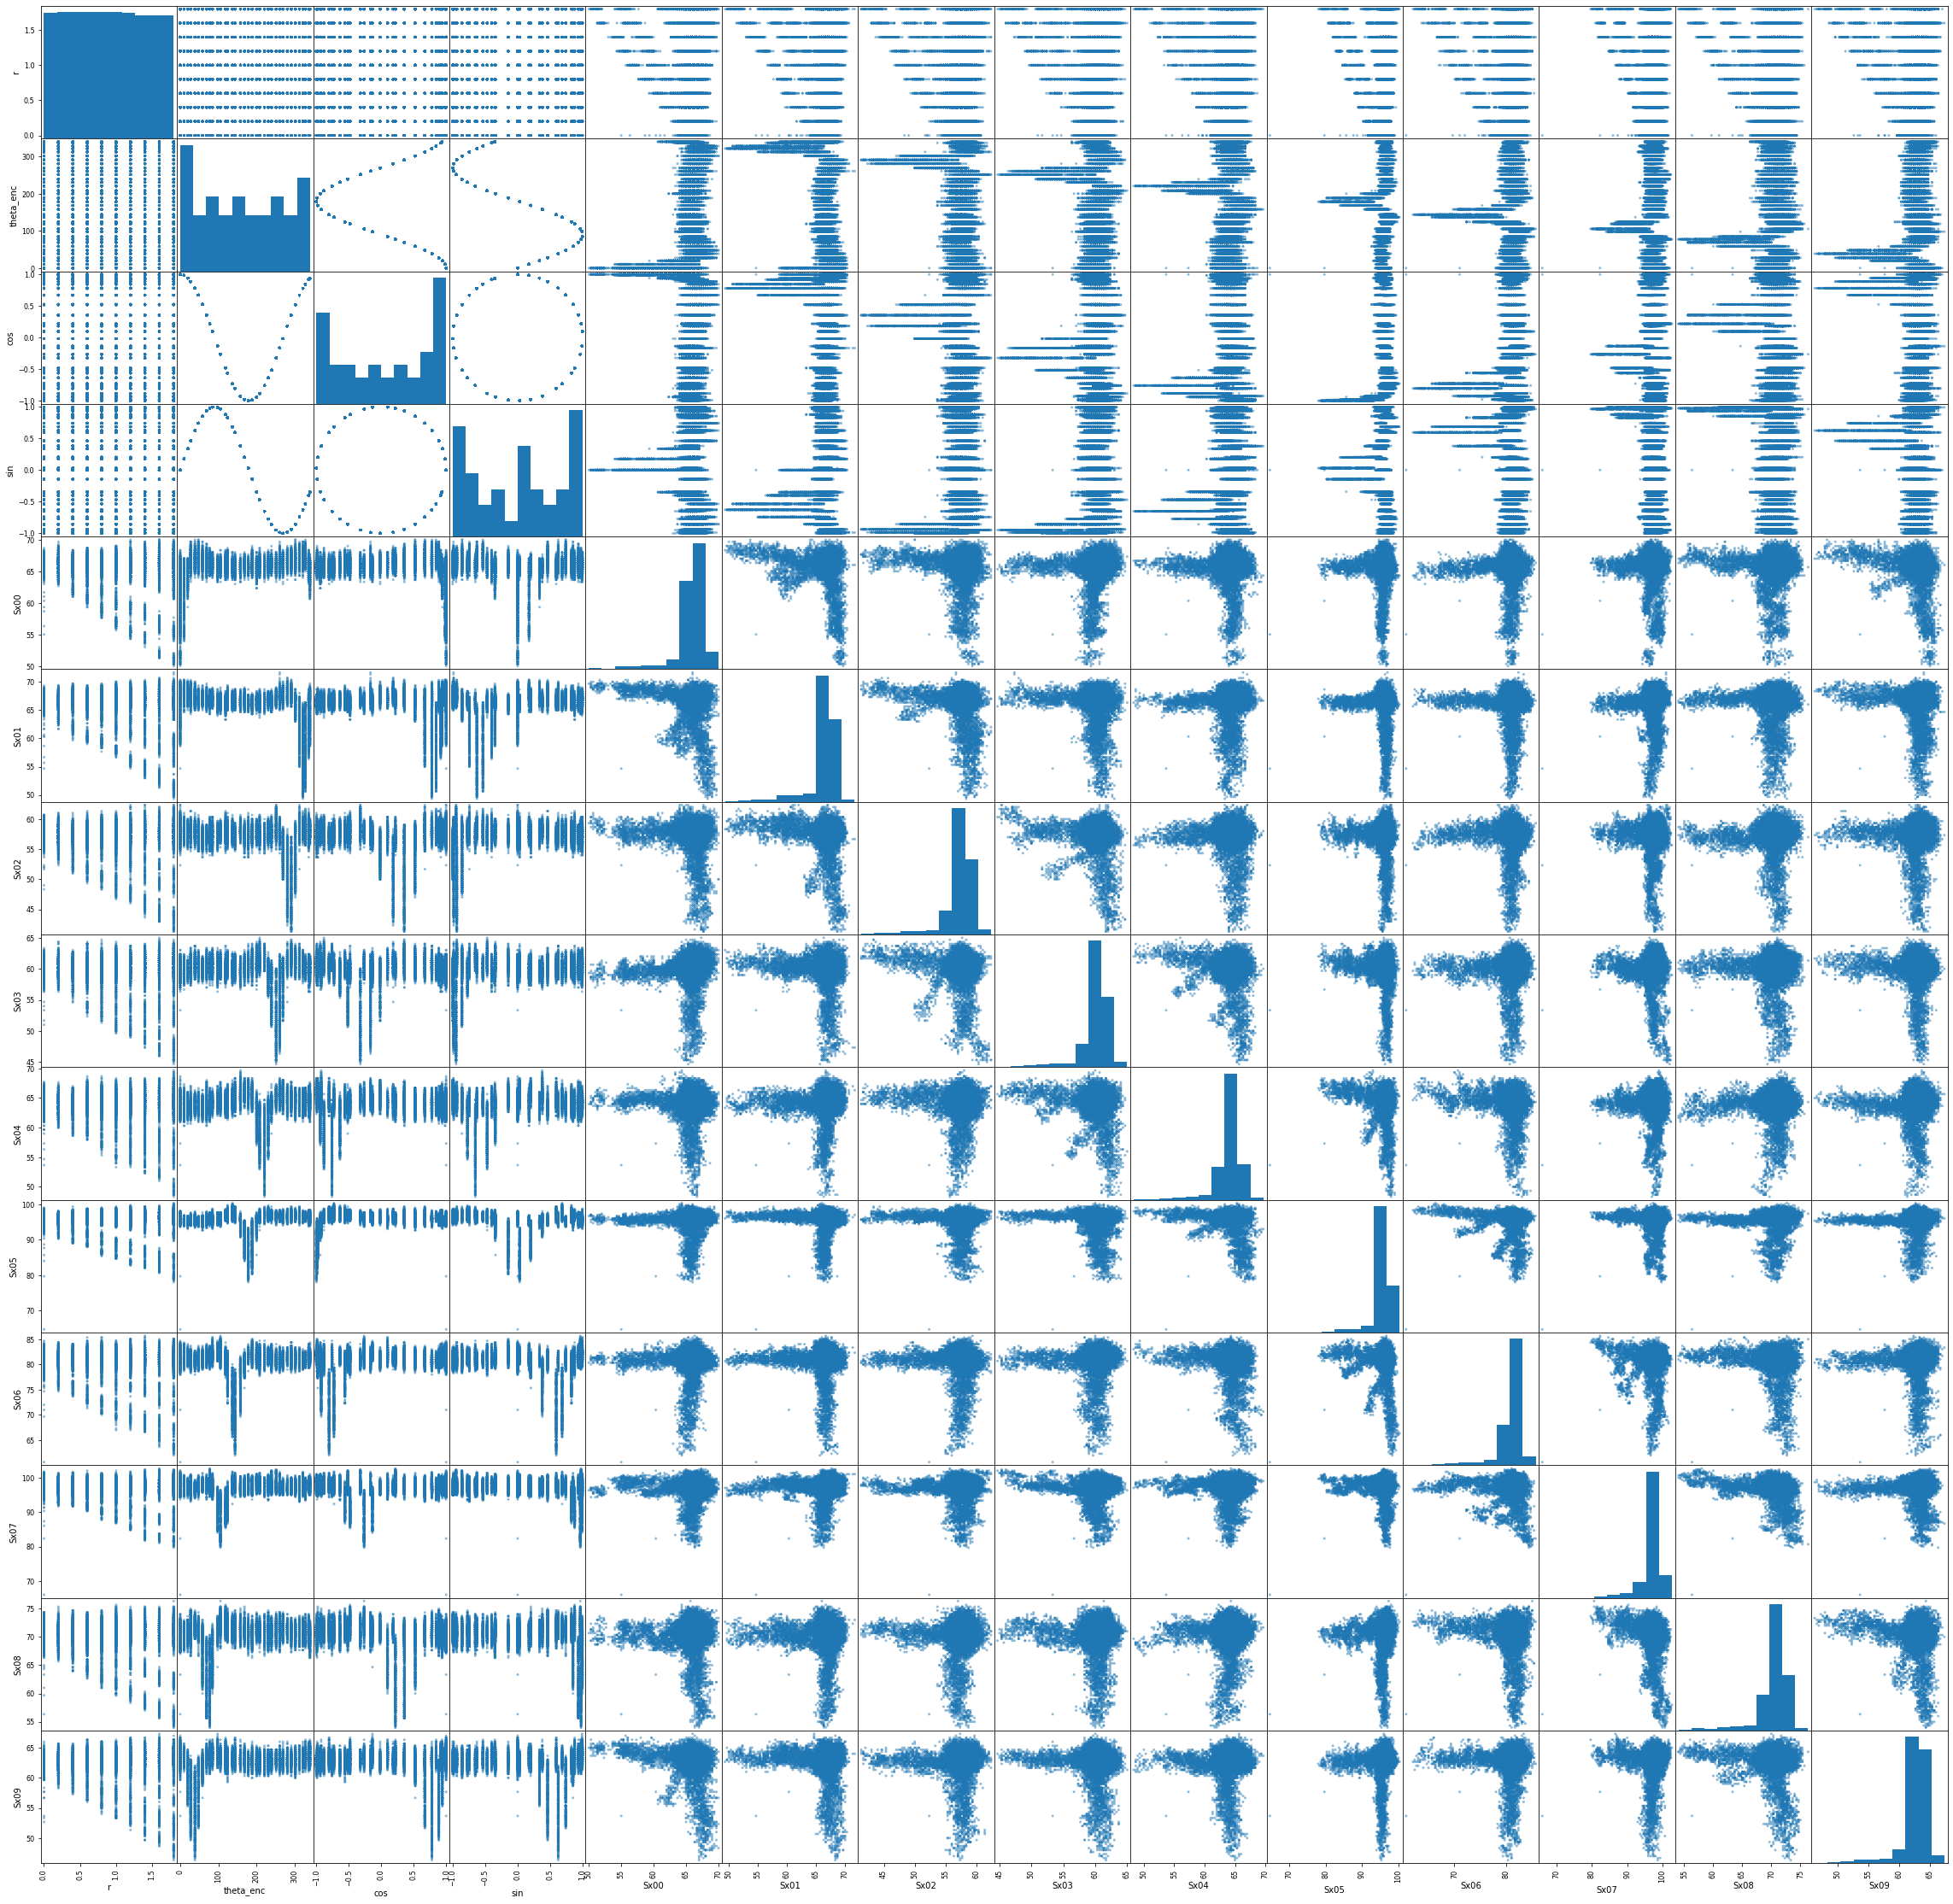

In [70]:
from pandas.plotting import scatter_matrix

attributes = ["r","theta_enc","cos","sin","Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
scatter_matrix(SensorData_extractZr[attributes],figsize=(40,40))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/savefig/210805_70ms_Mean3ea_hist_scatter2.png')

NameError: name 'sensor' is not defined